# EDA

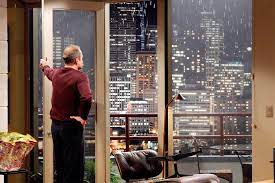

In [338]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [339]:
# reading data from CSV into data frame
df = pd.read_csv('data/eda_house_join_sales_on_left.csv')
df = df.reset_index()

In [340]:
# Getting some insight into the data
df.head()

,index,date,price,house_id,id_sales,id_houses,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   house_id       21597 non-null  int64  
 4   id_sales       21597 non-null  int64  
 5   id_houses      21597 non-null  int64  
 6   bedrooms       21597 non-null  float64
 7   bathrooms      21597 non-null  float64
 8   sqft_living    21597 non-null  float64
 9   sqft_lot       21597 non-null  float64
 10  floors         21597 non-null  float64
 11  waterfront     19206 non-null  float64
 12  view           21534 non-null  float64
 13  condition      21597 non-null  int64  
 14  grade          21597 non-null  int64  
 15  sqft_above     21597 non-null  float64
 16  sqft_basement  21145 non-null  float64
 17  yr_built       21597 non-null  int64  
 18  yr_ren

In [342]:
# Data Cleaning - Changing date from object to datetime with format %Y/%m/%d
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
df.date.dtype
# Rounding up float values
df['lat'] = df.lat.round(2)
df['long'] = df.long.round(2)
df['price'] = df.price.round(2)
# removing decimal cases from year values
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df["yr_renovated"]=df["yr_renovated"].astype(np.int64)
df["yr_built"]=df["yr_built"].astype(np.int64)
print(df.dtypes)


index                     int64
date             datetime64[ns]
price                   float64
house_id                  int64
id_sales                  int64
id_houses                 int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object


In [343]:
# Some entried need to be divided by ten to reach a sensible value:
df['yr_renovated'] = df.yr_renovated.apply(lambda x: (x)/10)
df["yr_renovated"]=df["yr_renovated"].astype(np.int64)

df['sqft_living'] = df.sqft_living.apply(lambda x: (x)/10)
df['sqft_lot'] = df.sqft_lot.apply(lambda x: (x)/10)
df['sqft_basement'] = df.sqft_basement.apply(lambda x: (x)/10)

In [344]:
# Dealing with NaN and zero values in yr_renovated column
df_yr_re = df
# df_yr_re = df_yr_re.dropna(axis=0,how='any')
df_yr_re['yr_renovated'] = df_yr_re['yr_renovated'].fillna(0)
# df_yr_re[df_yr_re['yr_renovated'].isna()]

# Filter out values equal to zero
df_yr_re= df_yr_re[df_yr_re['yr_renovated']!=0]
df_yr_re.info()


<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 1 to 20946
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          744 non-null    int64         
 1   date           744 non-null    datetime64[ns]
 2   price          744 non-null    float64       
 3   house_id       744 non-null    int64         
 4   id_sales       744 non-null    int64         
 5   id_houses      744 non-null    int64         
 6   bedrooms       744 non-null    float64       
 7   bathrooms      744 non-null    float64       
 8   sqft_living    744 non-null    float64       
 9   sqft_lot       744 non-null    float64       
 10  floors         744 non-null    float64       
 11  waterfront     652 non-null    float64       
 12  view           743 non-null    float64       
 13  condition      744 non-null    int64         
 14  grade          744 non-null    int64         
 15  sqft_above     744 non-nul

In [345]:
# Dealing with NaN values in Waterfront column
df_wf = df
df_wf = df_wf.dropna(axis=0,how='any')

df_wf.info()

df_wf['waterfront'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 18736 entries, 1 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          18736 non-null  int64         
 1   date           18736 non-null  datetime64[ns]
 2   price          18736 non-null  float64       
 3   house_id       18736 non-null  int64         
 4   id_sales       18736 non-null  int64         
 5   id_houses      18736 non-null  int64         
 6   bedrooms       18736 non-null  float64       
 7   bathrooms      18736 non-null  float64       
 8   sqft_living    18736 non-null  float64       
 9   sqft_lot       18736 non-null  float64       
 10  floors         18736 non-null  float64       
 11  waterfront     18736 non-null  float64       
 12  view           18736 non-null  float64       
 13  condition      18736 non-null  int64         
 14  grade          18736 non-null  int64         
 15  sqft_above     18736 non

array([0., 1.])

In [346]:
# Data Cleaning - Checking for duplicates
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

# Now I am finished with data cleaning and will start looking into correlations of the data

In [347]:
plt.rcParams.update({'font.size': 20})

Text(0.5, 0, 'Nr of Bedrooms')

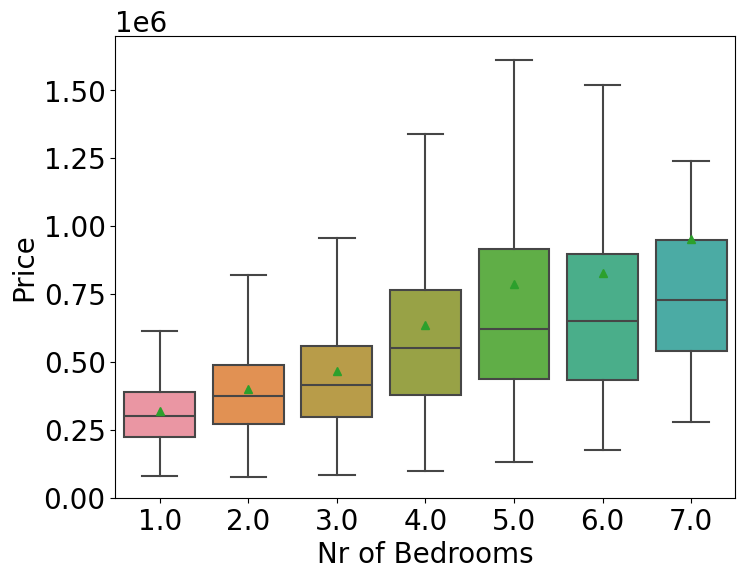

In [348]:
# Find correlation between price and nr of bedrooms
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df,x='bedrooms',y='price',ax=ax,showmeans=True,showfliers=False) # removing outliers
ax.set_xlim(-0.5,6.5)
ax.set_ylim(0,1.7e6) 
ax.set_ylabel('Price')
ax.set_xlabel('Nr of Bedrooms')

Text(0, 0.5, 'Price')

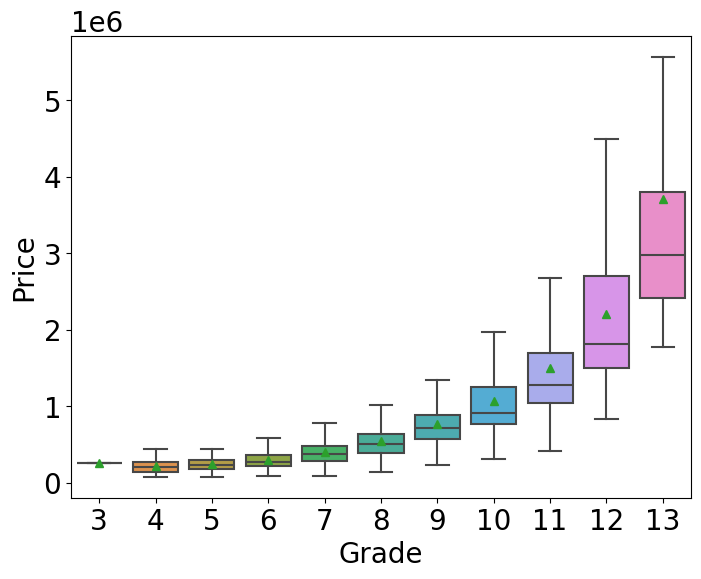

In [349]:
# Find correlation between price and grade
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df,x='grade',y='price',ax=ax,showmeans=True,showfliers=False) 
ax.set_xlabel('Grade')
ax.set_ylabel('Price')

In [350]:
avg_grade = df.grade.mean().round(0)

Text(0, 0.5, 'Price')

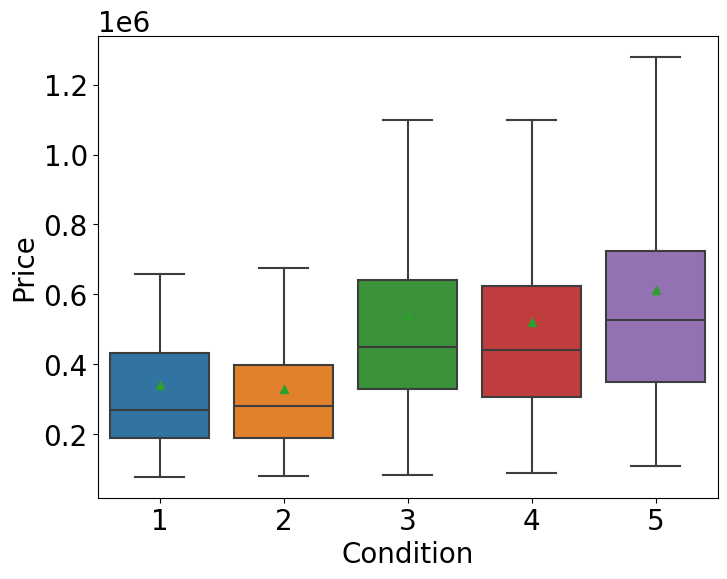

In [351]:
# Find correlation between price and condition
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=df,x='condition',y='price',ax=ax,showmeans=True,showfliers=False) # removing outliers
ax.set_xlabel('Condition')
ax.set_ylabel('Price')

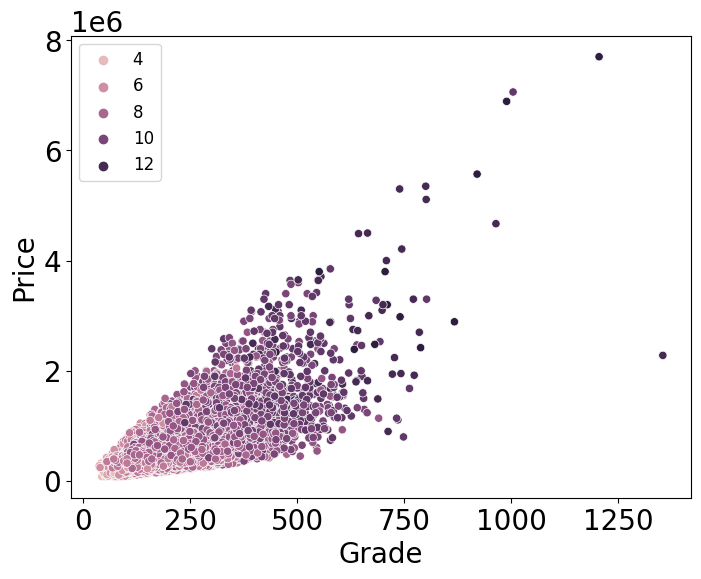

In [ ]:
# Correlation between price and square foot of living area
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df,x='sqft_living',y='price',ax=ax,hue='grade',alpha=1,legend='brief') # removing outliers
ax.set_xlabel('sqft_living')
ax.set_ylabel('Price')
plt.legend(loc='upper left',fontsize=12)

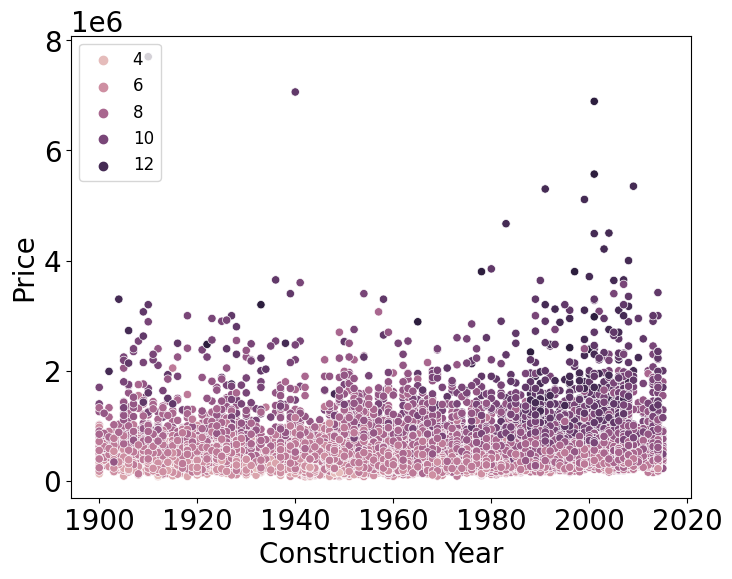

In [353]:
# Correlation between price and built year 
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df,x='yr_built',y='price',ax=ax,hue='grade') 
ax.set_xlabel('Construction Year')
ax.set_ylabel('Price')
plt.legend(loc='upper left',fontsize=12)


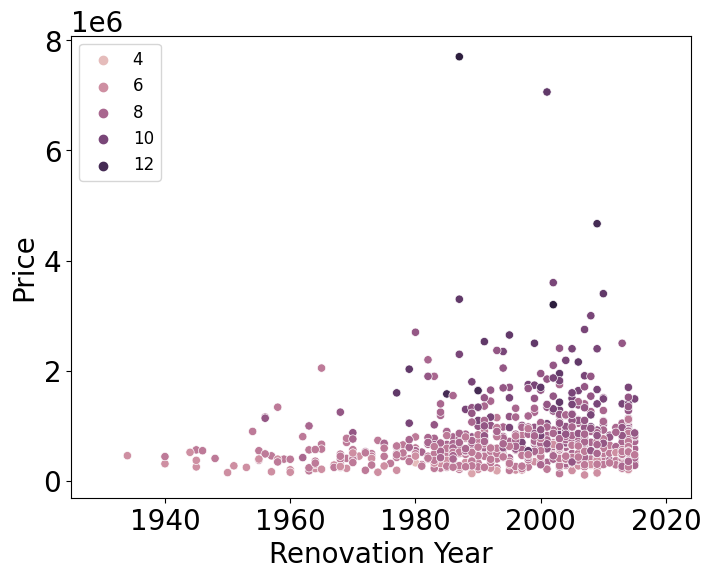

In [354]:
# Correlation between price and renovation year
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df,x='yr_renovated',y='price',ax=ax,hue='grade') # removing outliers
ax.set_xlim(1925,2024)
ax.set_xlabel('Renovation Year')
ax.set_ylabel('Price')
plt.legend(loc='upper left',fontsize=12)


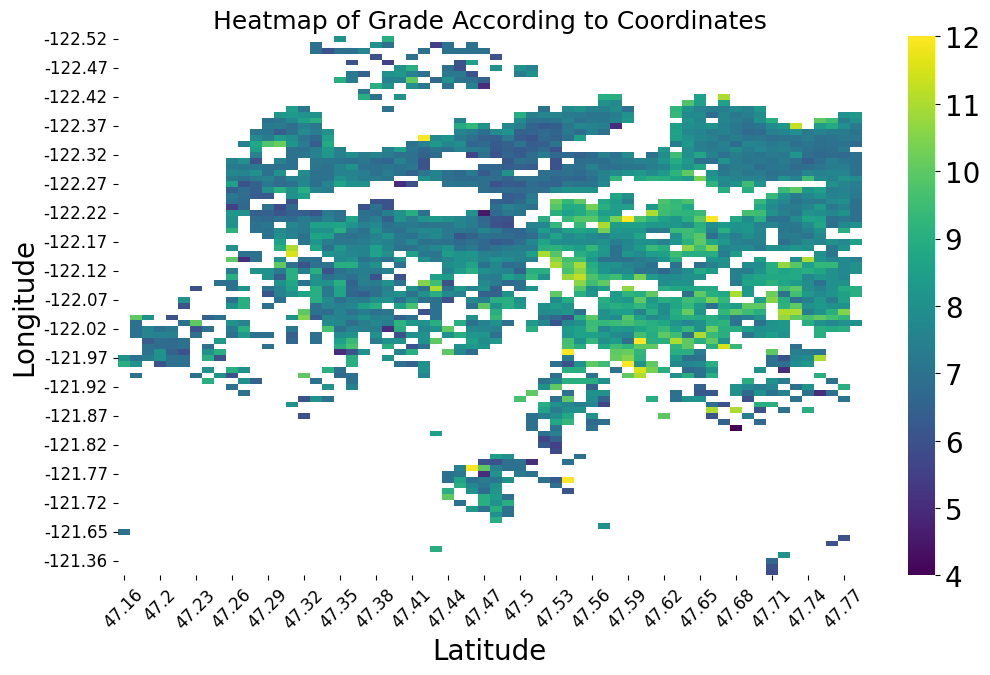

In [355]:
# Find area of better grade according to coordinates
df_hm1 = df[['lat', 'long', 'grade']].copy()

df_p1 = df_hm1.pivot_table(index='long',columns='lat',values='grade',dropna=True)

fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(df_p1, cmap='viridis',ax=ax)
ax.set_title("Heatmap of Grade According to Coordinates", fontsize=18)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.tick_params(labelsize=12)
ax.tick_params(axis='x',rotation=45)


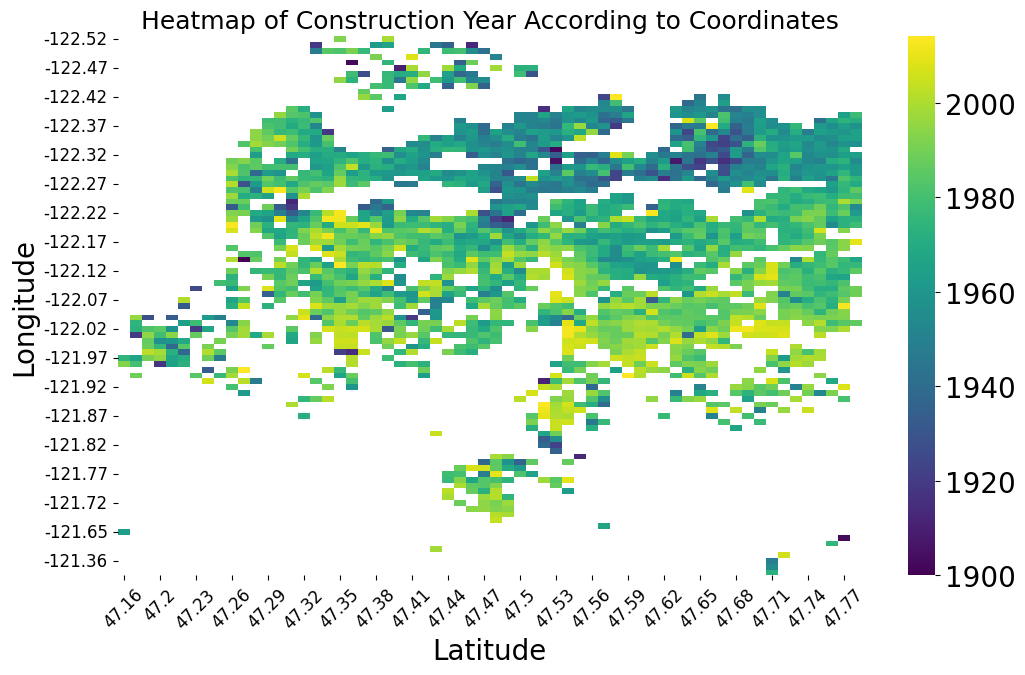

In [356]:
# Exploring spatial correlations with heatmap:
df_hm1 = df[['lat', 'long', 'yr_built']].copy()

df_p1 = df_hm1.pivot_table(index='long',columns='lat',values='yr_built',dropna=True,)

fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(df_p1, cmap='viridis',ax=ax)
ax.set_title("Heatmap of Construction Year According to Coordinates", fontsize=18)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.tick_params(labelsize=12)
ax.tick_params(axis='x',rotation=45)

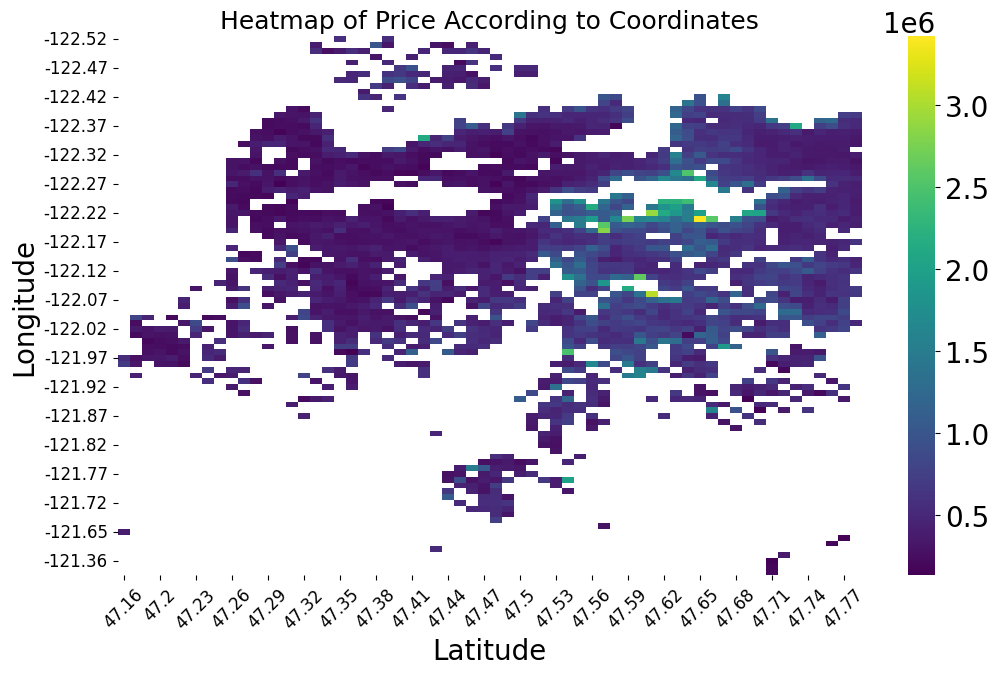

In [357]:
# Find area of better price according to coordinates
df_hm1 = df[['lat', 'long', 'price']].copy()

df_p1 = df_hm1.pivot_table(index='long',columns='lat',values='price',dropna=True,)

fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(df_p1, cmap='viridis',ax=ax)
ax.set_title("Heatmap of Price According to Coordinates",fontsize=18)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.tick_params(labelsize=12)
ax.tick_params(axis='x',rotation=45)

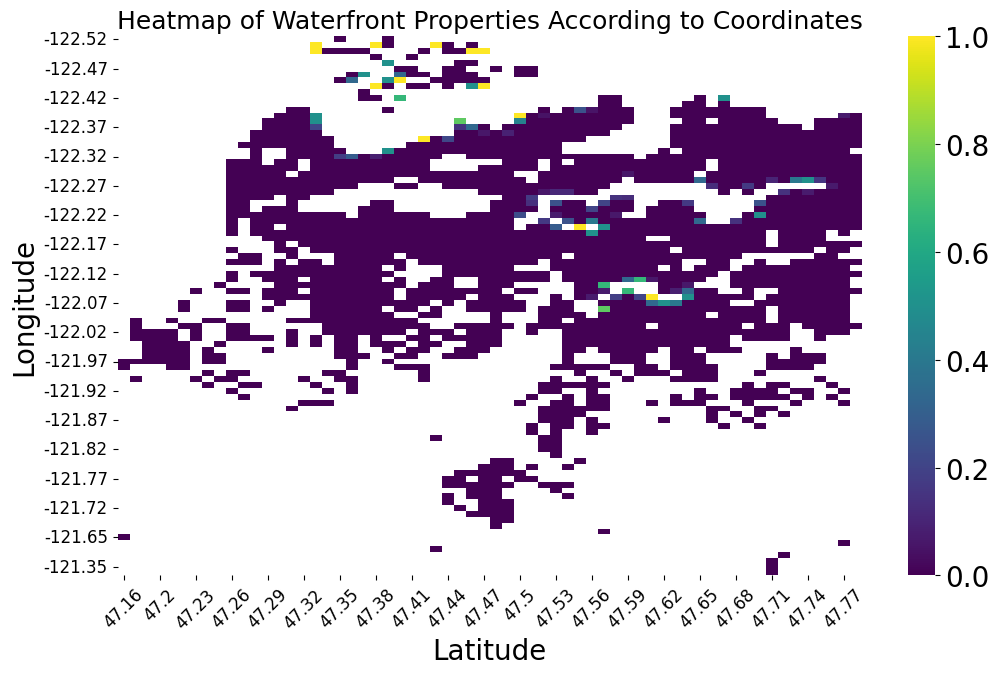

In [358]:
# Find area of waterfront according to coordinates
df_hm1 = df[['lat', 'long', 'waterfront']].copy()

df_p1 = df_hm1.pivot_table(index='long',columns='lat',values='waterfront',dropna=True,)

fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(df_p1, cmap='viridis',ax=ax)
ax.set_title("Heatmap of Waterfront Properties According to Coordinates",fontsize=18)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.tick_params(labelsize=12)
ax.tick_params(axis='x',rotation=45)

Defining search criterias:

#1: Wants house of grade under 8 - my client is handy and willing to renovate himself, he wants at least 4 bedrooms and 2 bathrooms, he wants no waterfront, as his kids don't know how to swim. He wants at least 120m² of living area and at least 50m² garden for his kids to play in and his garden does not have to be larger than 100m². He wants a basement to storage alls his kid's stuff.

#2: my client sets the limit price as average price for houses within first criteria

#3: My client want a social neighborhood, where houses are in average of grade higher or equal to 8

In [359]:
# Add column for garden area = lot - living area
df.eval('sqft_garden = sqft_lot - sqft_living',inplace=True)

In [360]:
# Apply condition #1 as filter

# new data frame filtered by criteria 1:
df_c1 = df[ (df['bedrooms']>=4) & (df['bathrooms']>=2) & (df['grade']<=8) & (df['waterfront']!=1) & (df['sqft_living']>120) & (df['sqft_garden']>50) & (df['sqft_garden']<100) & (df['sqft_basement']!=0) ]

lim_price = df_c1.price.mean().round(0)
lim_price

671123.0

In [361]:
# new data frame filtered by criteria 2
df_c2 = df_c1[df_c1['price']<lim_price]

In [362]:
df_c1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 432 to 21550
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          62 non-null     int64         
 1   date           62 non-null     datetime64[ns]
 2   price          62 non-null     float64       
 3   house_id       62 non-null     int64         
 4   id_sales       62 non-null     int64         
 5   id_houses      62 non-null     int64         
 6   bedrooms       62 non-null     float64       
 7   bathrooms      62 non-null     float64       
 8   sqft_living    62 non-null     float64       
 9   sqft_lot       62 non-null     float64       
 10  floors         62 non-null     float64       
 11  waterfront     57 non-null     float64       
 12  view           62 non-null     float64       
 13  condition      62 non-null     int64         
 14  grade          62 non-null     int64         
 15  sqft_above     62 non-nul

In [363]:
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 777 to 21298
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          32 non-null     int64         
 1   date           32 non-null     datetime64[ns]
 2   price          32 non-null     float64       
 3   house_id       32 non-null     int64         
 4   id_sales       32 non-null     int64         
 5   id_houses      32 non-null     int64         
 6   bedrooms       32 non-null     float64       
 7   bathrooms      32 non-null     float64       
 8   sqft_living    32 non-null     float64       
 9   sqft_lot       32 non-null     float64       
 10  floors         32 non-null     float64       
 11  waterfront     30 non-null     float64       
 12  view           32 non-null     float64       
 13  condition      32 non-null     int64         
 14  grade          32 non-null     int64         
 15  sqft_above     32 non-nul

In [364]:
# groupyby and average grade by zipcode, to limit social areas
df_social = df.groupby('zipcode').mean().reset_index()

df_social['grade'] = df_social.grade.round(0)

social_zipcodes = df_social[df_social['grade']>=8].zipcode.unique()

social_zipcodes

array([98003, 98004, 98005, 98006, 98007, 98008, 98011, 98019, 98023,
       98024, 98027, 98028, 98029, 98033, 98034, 98038, 98039, 98040,
       98045, 98052, 98053, 98058, 98059, 98065, 98072, 98074, 98075,
       98077, 98092, 98102, 98105, 98109, 98112, 98116, 98119, 98122,
       98177, 98199], dtype=int64)

In [365]:
# Filtering data according to social areas
df_result = df_c2[df_c2.zipcode.isin(social_zipcodes)]
df_result

,index,date,price,house_id,id_sales,id_houses,bedrooms,bathrooms,sqft_living,sqft_lot,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_garden
777,777,2014-10-16,493000.000,3814400125,778,3814400125,4.000,2.000,191.000,287.400,...,1060.000,85.000,1910,0,98122,47.610,-122.300,1520.000,2874.000,96.400
1893,1893,2014-05-28,599000.000,4278900055,1894,4278900055,4.000,2.750,202.000,275.000,...,1010.000,101.000,1917,2014,98122,47.610,-122.290,1840.000,4000.000,73.000
7305,7305,2014-12-01,555000.000,6373000130,7306,6373000130,4.000,2.250,172.000,230.000,...,860.000,86.000,1940,2014,98116,47.580,-122.410,1720.000,4680.000,58.000
7330,7330,2014-07-02,599950.000,6870310010,7331,6870310010,4.000,3.500,250.000,308.000,...,1810.000,69.000,2008,0,98052,47.670,-122.140,2060.000,3295.000,58.000
15038,15038,2014-11-04,429900.000,1565930130,15039,1565930130,4.000,3.250,376.000,467.500,...,2740.000,102.000,2007,0,98038,47.390,-122.050,3280.000,4033.000,91.500
19239,19239,2014-12-29,660000.000,8812401450,19240,8812401450,10.000,3.000,292.000,374.500,...,1860.000,106.000,1913,0,98105,47.660,-122.320,1810.000,3745.000,82.500
19854,19854,2014-09-09,665000.000,710600160,19855,710600160,4.000,3.500,265.000,347.400,...,2230.000,42.000,2011,0,98027,47.540,-122.050,2330.000,3474.000,82.400
20085,20085,2015-01-16,550000.000,3574770100,20086,3574770100,4.000,2.750,365.000,453.400,...,2940.000,71.000,2014,0,98028,47.740,-122.220,2400.000,7682.000,88.400
20831,20831,2015-04-23,475000.000,1523059239,20832,1523059239,5.000,3.500,278.000,358.300,...,2180.000,60.000,2005,0,98059,47.490,-122.150,2640.000,3850.000,80.300
21244,21244,2015-04-08,495000.000,1776230190,21245,1776230190,4.000,3.500,317.000,385.800,...,2530.000,64.000,2008,0,98059,47.500,-122.160,2640.000,3844.000,68.800


In [374]:
df_result_disp = df_result[['house_id','price']].copy()
display(df_result_disp)

,house_id,price
777,3814400125,493000.000
1893,4278900055,599000.000
7305,6373000130,555000.000
7330,6870310010,599950.000
15038,1565930130,429900.000
19239,8812401450,660000.000
19854,710600160,665000.000
20085,3574770100,550000.000
20831,1523059239,475000.000
21244,1776230190,495000.000
